# Metadata

```{yaml}
Course:   DS 5001 
Module:   02 Lab
Topic:    Tokenizing with SciKit Learn
Author:   R.C. Alvarado
```

**Purpose:**
* Demonstrate how to tokenize a raw text with SciKit Learn.

**Note:**
* This includes content that will be covered in M05 Vector Space Models of Text.

## Set Up

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [3]:
sns.set()

In [4]:
data_home = "../data"

In [5]:
text_file = f"{data_home}/gutenberg/pg105.txt"

## Import text

In [6]:
def import_text(text_file):
    docs = pd.DataFrame(dict(doc_str=open(text_file, 'r').read().split('\n\n')))
    a = docs[docs.doc_str.str.contains("1818")].index.values[0]
    b = docs[docs.doc_str.str.contains("Finis")].index.values[0]
    docs = docs[(docs.index > a) & (docs.index < b)]
    docs.doc_str = docs.doc_str.str.replace(r"\n+", " ", regex=True)
    docs = docs[docs.doc_str != '']
    docs = docs.reset_index(drop=True)
    docs.index.name = 'doc_id' 
    return docs

In [7]:
docs = import_text(text_file)

In [8]:
docs

,doc_str
doc_id,
0,Chapter 1
1,"Sir Walter Elliot, of Kellynch Hall, in Somer..."
2,"""ELLIOT OF KELLYNCH HALL."
3,"""Walter Elliot, born March 1, 1760, married, J..."
4,Precisely such had the paragraph originally st...
...,...
1025,Mrs Clay's affections had overpowered her inte...
1026,It cannot be doubted that Sir Walter and Eliza...
1027,"Anne, satisfied at a very early period of Lady..."


## Vectorize Corpus

We use SciKit Learn's `CountVectorizer()` method, which as the following signature:

```
CountVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
```

This the doctring from the function:

>Convert a collection of text documents to a matrix of token counts <br/><br/>
This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix. <br/><br/>
If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data. <br/><br/>
Read more in the :ref:`User Guide <text_feature_extraction>`.


In [9]:
engine = CountVectorizer()
model = engine.fit_transform(docs.doc_str)

## Extract Vocabulary

In [29]:
V = engine.get_feature_names()

In [30]:
len(V)

5751

In [31]:
V[100:110]

['acted',
 'acting',
 'action',
 'actions',
 'active',
 'activity',
 'actual',
 'actually',
 'actuated',
 'acute']

## Extract Count Matrix

In [32]:
X = pd.DataFrame(model.toarray(), columns=V)
X.index.name = 'doc_id'

In [14]:
X.shape

(1030, 5751)

In [15]:
X

,10,11,12,13,14,15,16,17,1760,1784,...,younker,your,yours,yourself,yourselves,youth,youthful,zeal,zealous,zealously
doc_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
VOCAB = X.sum().to_frame('n')

In [34]:
VOCAB

,n
10,1
11,1
12,1
13,1
14,1
...,...
youth,15
youthful,1
zeal,5
zealous,2


## Show Stats

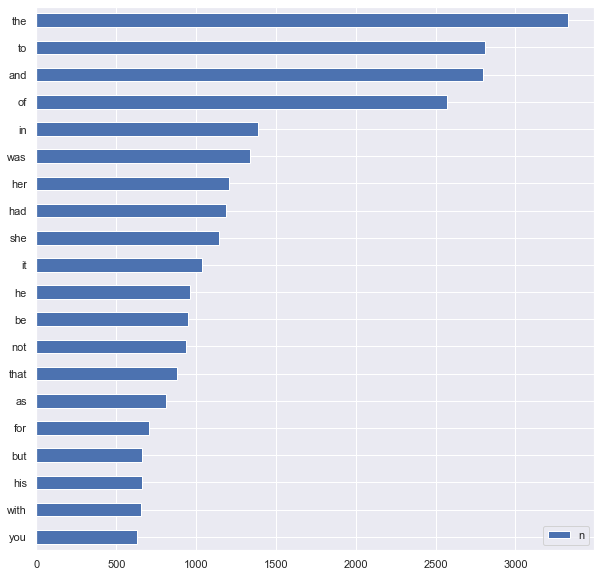

In [21]:
VOCAB.sort_values('n').tail(20).plot.barh(figsize=(10,10));